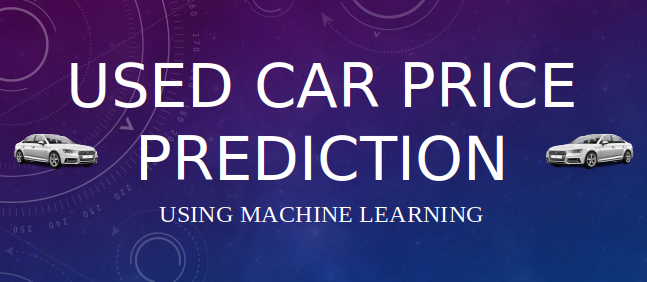

Submission by: Halit Vural - C9807 <br>
Submission date: Jan 18, 2022

# Problem definition

For this project we are using a car dataset, where we want to <u>predict the selling price</u> of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [12]:
df = pd.read_csv("car_dataset.csv")

# Data Exploration

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Data Cleaning

In [13]:
df = df.drop("Car_Name", axis =1)

In [14]:
df = pd.get_dummies(df, drop_first=True)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,1,0,1
299,2017,11.50,12.50,9000,0,1,0,0,1


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
Fuel_Type_Diesel,301.0,0.199336,0.400166,0.00,0.0,0.0,0.0,1.0
Fuel_Type_Petrol,301.0,0.794020,0.405089,0.00,1.0,1.0,1.0,1.0
Seller_Type_Individual,301.0,0.352159,0.478439,0.00,0.0,0.0,1.0,1.0
Transmission_Manual,301.0,0.867110,0.340021,0.00,1.0,1.0,1.0,1.0


In [15]:
df['Age'] = 2019 - df['Year']
df = df.drop("Year", axis=1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
Fuel_Type_Diesel,301.0,0.199336,0.400166,0.00,0.0,0.0,0.0,1.0
Fuel_Type_Petrol,301.0,0.794020,0.405089,0.00,1.0,1.0,1.0,1.0
Seller_Type_Individual,301.0,0.352159,0.478439,0.00,0.0,0.0,1.0,1.0
Transmission_Manual,301.0,0.867110,0.340021,0.00,1.0,1.0,1.0,1.0
Age,301.0,5.372093,2.891554,1.00,3.0,5.0,7.0,16.0


## Which feature is more suitable for linear regression?

In [16]:
X = df.drop("Selling_Price", axis =1)
y = df["Selling_Price"]

In [17]:
print("Corrolation between:")
print("----------------------")
for i in df.drop(columns ="Selling_Price"):
    print(f"Selling-Price & {i:<25}:  {df.Selling_Price.corr(df[i])}")

Corrolation between:
----------------------
Selling-Price & Present_Price            :  0.8789825451614957
Selling-Price & Kms_Driven               :  0.029187090674291257
Selling-Price & Owner                    :  -0.08834409908720235
Selling-Price & Fuel_Type_Diesel         :  0.5523392892828558
Selling-Price & Fuel_Type_Petrol         :  -0.5405710829430346
Selling-Price & Seller_Type_Individual   :  -0.550723761577876
Selling-Price & Transmission_Manual      :  -0.36712763330907255
Selling-Price & Age                      :  -0.23614098016042748


<AxesSubplot:>

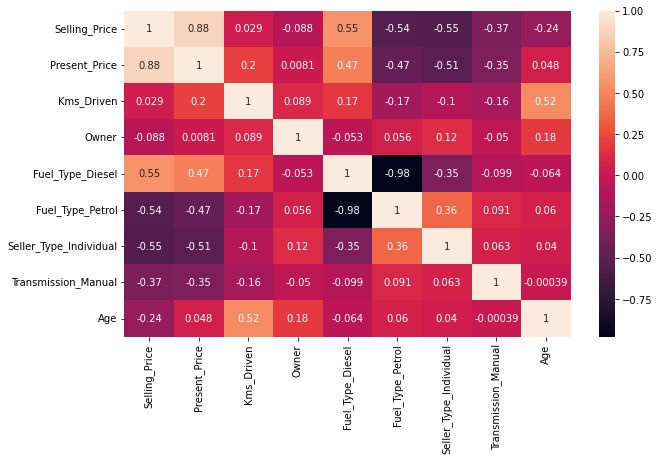

In [18]:
sns.heatmap(df.corr(), annot =True)

### Drop uncorrolated features to clarify insight

In [20]:
df_ = df.drop(labels=["Fuel_Type_Petrol", "Seller_Type_Individual", "Transmission_Manual"], axis='columns')
df_

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Age
0,3.35,5.59,27000,0,0,5
1,4.75,9.54,43000,0,1,6
2,7.25,9.85,6900,0,0,2
3,2.85,4.15,5200,0,0,8
4,4.60,6.87,42450,0,1,5
...,...,...,...,...,...,...
296,9.50,11.60,33988,0,1,3
297,4.00,5.90,60000,0,0,4
298,3.35,11.00,87934,0,0,10
299,11.50,12.50,9000,0,1,2


<AxesSubplot:>

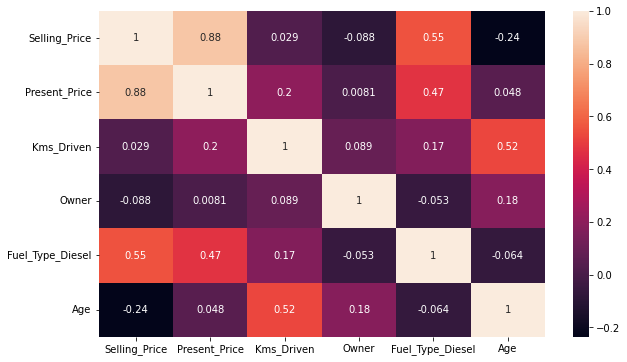

In [21]:
sns.heatmap(df_.corr(), annot=True)

## The relationship between independent variables and dependent variable

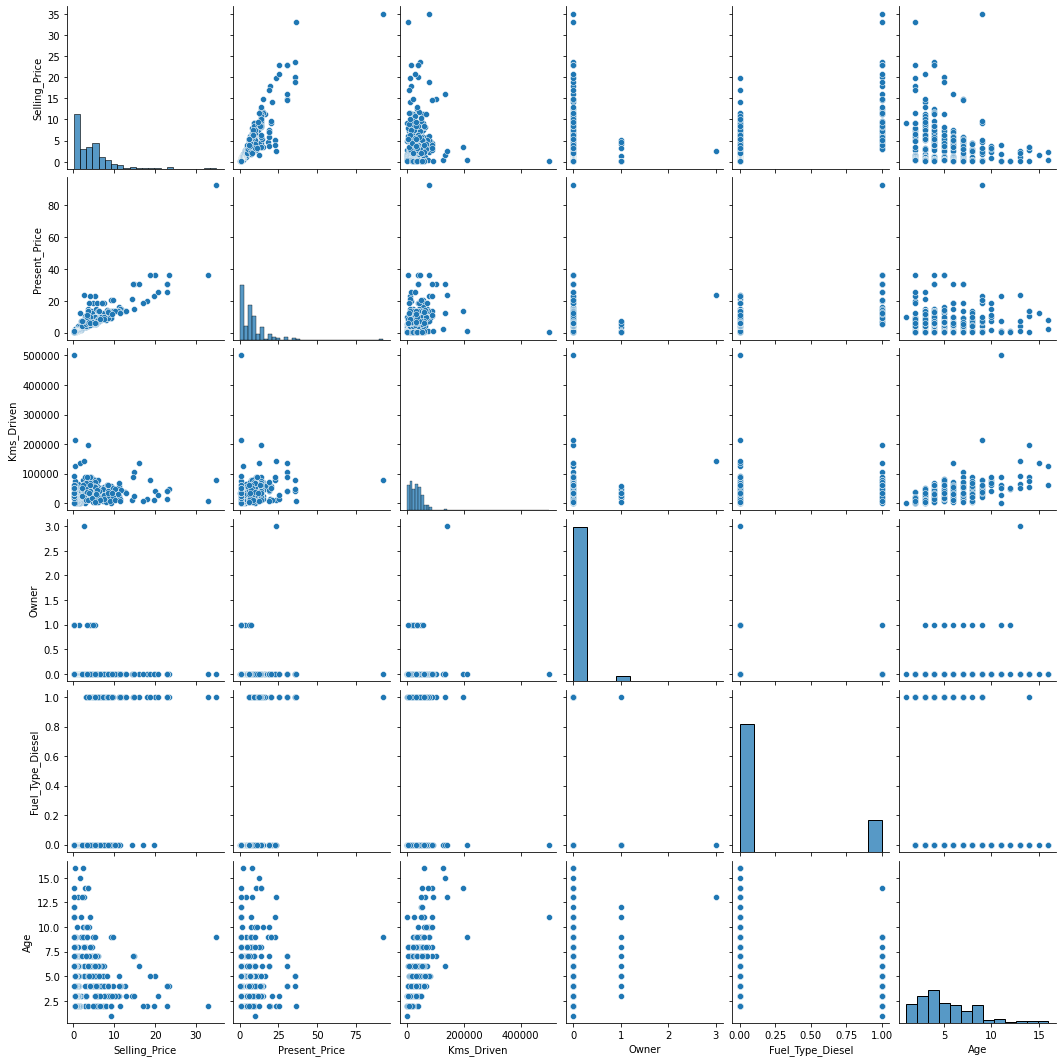

In [22]:
sns.pairplot(df_)

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

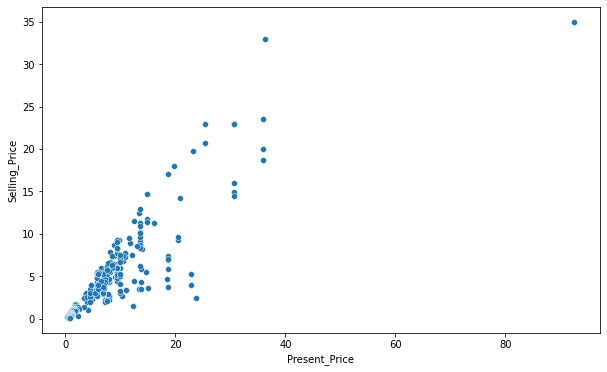

In [23]:
sns.scatterplot(data=df_, y="Selling_Price", x="Present_Price")

In [24]:
sns.scatterplot(data=df_, y="Selling_Price", x="Seller_Type_Dealer")

ValueError: Could not interpret value `Seller_Type_Dealer` for parameter `x`

<AxesSubplot:xlabel='Transmission_Automatic', ylabel='Selling_Price'>

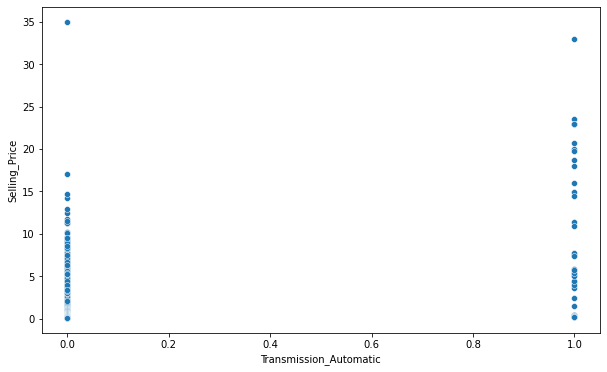

In [17]:
sns.scatterplot(data=df_, x="Transmission_Automatic", y="Selling_Price")

## Correlation between independent variable and dependent variable

In [25]:
corr = df_["Selling_Price"].corr(df_["Present_Price"])
corr

0.8789825451614957

In [26]:
R2 = corr**2
R2

0.7726103146985808

## Our First Regression Attempt

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

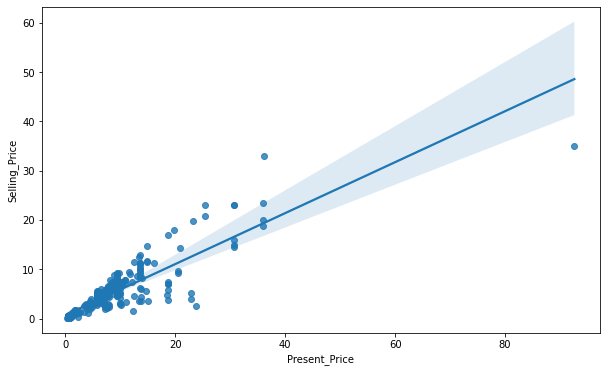

In [28]:
sns.regplot(x="Present_Price", y="Selling_Price", data=df_) #, ci=None)

In [29]:
X= df_["Present_Price"]
y= df_["Selling_Price"]

In [30]:
slope, intercept = np.polyfit(X, y, deg=1)
slope, intercept

(0.5168490273953965, 0.71852747098177)

In [31]:
y_pred = slope*X + intercept   # b2*X2 + b1*X + b0
y_pred

0      3.607714
1      5.649267
2      5.809490
3      2.863451
4      4.269280
         ...   
296    6.713976
297    3.767937
298    6.403867
299    7.179140
300    3.767937
Name: Present_Price, Length: 301, dtype: float64

In [32]:
evaluation = {"Actual Price": y, "Predicted": y_pred, "Residual":y-y_pred, "LSE": (y-y_pred)**2}
eval_table = pd.DataFrame(evaluation)
eval_table

,Actual Price,Predicted,Residual,LSE
0,3.35,3.607714,-0.257714,0.066416
1,4.75,5.649267,-0.899267,0.808681
2,7.25,5.809490,1.440510,2.075068
3,2.85,2.863451,-0.013451,0.000181
4,4.60,4.269280,0.330720,0.109376
...,...,...,...,...
296,9.50,6.713976,2.786024,7.761929
297,4.00,3.767937,0.232063,0.053853
298,3.35,6.403867,-3.053867,9.326102
299,11.50,7.179140,4.320860,18.669828


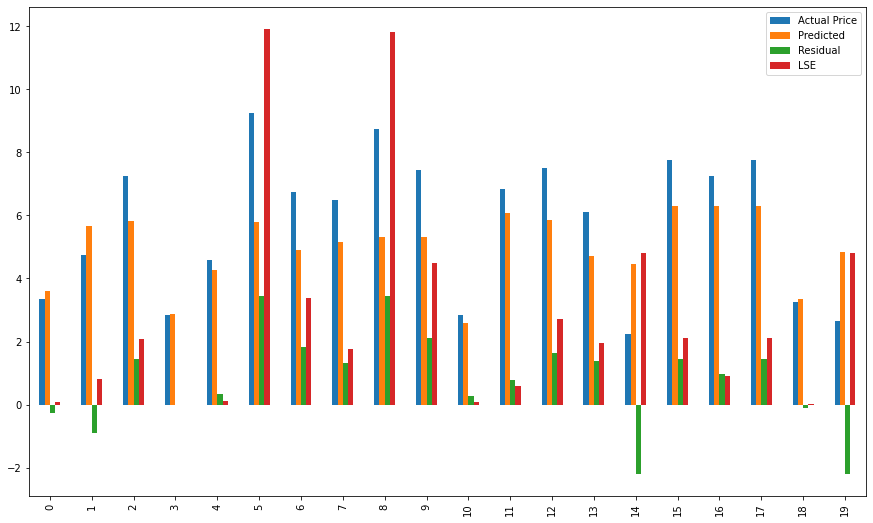

In [33]:
eval_table.head(20).plot(kind ="bar", figsize=(15,9))
plt.show()

## Error Metrics of First Attempt

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
R2 = r2_score(y, y_pred)
R2

0.7726103146985799

In [35]:
mae = mean_absolute_error(y, y_pred)
mae

1.4778880466892335

In [36]:
mse = mean_squared_error(y, y_pred)
mse

5.855089487051356

In [37]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

2.4197292177124603

### Adjusted R2 Score

In [30]:
def adjusted_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [31]:
adjusted_r2(y, y_pred, df_)

0.7671777966197064

### Plotting residuals

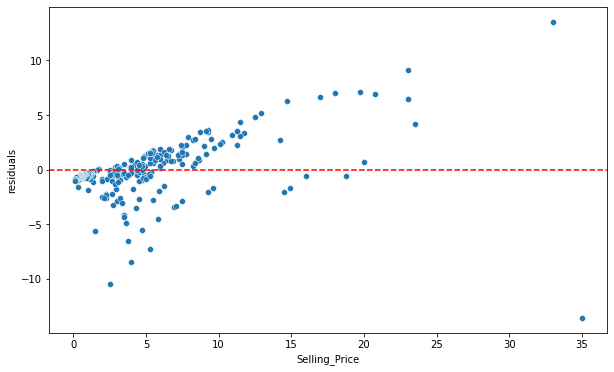

In [32]:
y_test = y
residuals = y_test - y_pred

plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<AxesSubplot:ylabel='Density'>

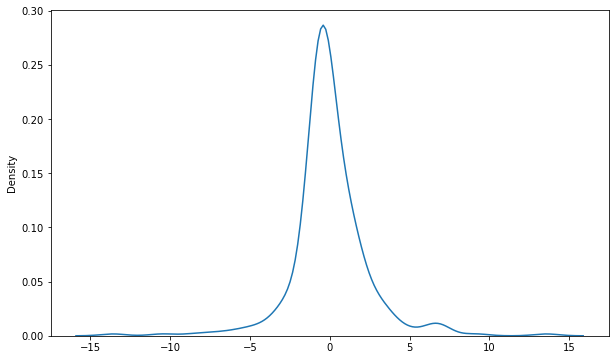

In [33]:
sns.kdeplot(residuals)

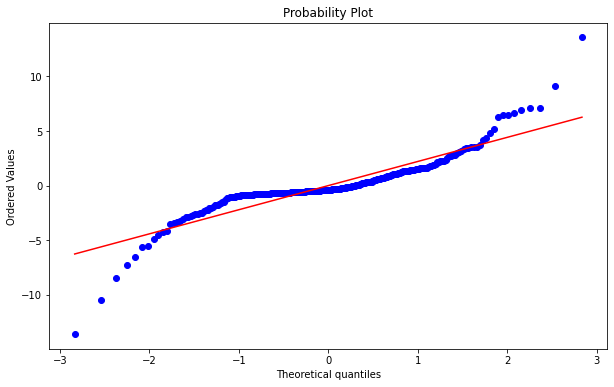

In [34]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [35]:
from scipy.stats import skew
skew(residuals)

0.08387931093393584

## Scaling the Data

Let's define the feature to scale.

In [38]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
Fuel_Type_Diesel,301.0,0.199336,0.400166,0.00,0.0,0.0,0.0,1.0
Age,301.0,5.372093,2.891554,1.00,3.0,5.0,7.0,16.0


In [39]:
from sklearn.model_selection import train_test_split

X = df_.drop("Selling_Price", axis =1)
y = df_["Selling_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [41]:
scaler.fit(X_train)

StandardScaler()

In [42]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.76923237, -0.83904661, -0.18730358, -0.48507125,  1.99046855],
       [ 1.26268234,  0.43381798, -0.18730358, -0.48507125,  0.24444351],
       [ 0.38139709,  0.12793616, -0.18730358,  2.06155281, -0.80317152],
       ...,
       [-0.44579392, -0.49554421,  3.38849211, -0.48507125, -0.1047615 ],
       [ 0.292367  ,  0.74767564, -0.18730358, -0.48507125,  0.94285352],
       [-0.63399678, -0.78963873, -0.18730358, -0.48507125, -1.15237653]])

In [43]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.77035933, -0.31908751, -0.18730358, -0.48507125, -0.80317152],
       [ 0.69807376, -0.62541635, -0.18730358, -0.48507125, -0.80317152],
       [ 0.2247492 ,  0.52790469, -0.18730358,  2.06155281,  0.59364851],
       [-0.77035933, -0.06028433,  3.38849211, -0.48507125,  0.94285352],
       [ 1.26268234,  0.057377  , -0.18730358, -0.48507125,  0.24444351],
       [ 0.17065497,  0.11304321, -0.18730358,  2.06155281, -0.45396651],
       [-0.66893264, -0.27203238, -0.18730358, -0.48507125, -0.45396651],
       [-0.73542347, -0.69552848, -0.18730358, -0.48507125, -0.1047615 ],
       [-0.77374022, -0.55436312, -0.18730358, -0.48507125, -0.80317152],
       [ 0.28673218,  0.17499128, -0.18730358,  2.06155281, -0.1047615 ],
       [ 0.27320862, -0.83502339, -0.18730358,  2.06155281, -1.50158154],
       [-0.66893264, -0.10733946, -0.18730358, -0.48507125,  0.24444351],
       [ 0.5222675 , -0.53083556, -0.18730358, -0.48507125, -0.1047615 ],
       [-0.77712111, -0.85316314, -0.1

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score 

These values show where in the normal distribution they correspond to the z score.


In [45]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4
mean,-0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0


In [43]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6
mean,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Linear Regression with Scaled Data

In [46]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [47]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [51]:
lin_eval =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
lin_eval

,linear_train,linear_test
R2,0.868543,0.860594
mae,1.239591,1.410048
mse,3.226313,3.969488
rmse,1.796194,1.992357


Scores seem to be cared.

In [52]:
scaler = MinMaxScaler()

In [53]:
scaler.fit(X_train)

MinMaxScaler()

In [54]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [56]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [57]:
lin_eval = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
lin_eval

,linear_train,linear_test
R2,0.868543,0.860594
mae,1.239591,1.410048
mse,3.226313,3.969488
rmse,1.796194,1.992357


Scores seem okay now.Min-Max Scaling worked fine.

## Multicolineratiy

In [58]:
def color_red(val):
    
    if val > 0.85 : # and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [60]:
pd.DataFrame(X).corr().style.applymap(color_red)

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Age
Present_Price,1.000000,0.203647,0.008057,0.473306,0.047584
Kms_Driven,0.203647,1.000000,0.089216,0.172515,0.524342
Owner,0.008057,0.089216,1.000000,-0.053469,0.182104
Fuel_Type_Diesel,0.473306,0.172515,-0.053469,1.000000,-0.064315
Age,0.047584,0.524342,0.182104,-0.064315,1.000000


## Cross Validate

In [57]:
#from sklearn.metrics import SCORERS
#list(SCORERS.keys())

In [61]:
from sklearn.model_selection import cross_validate, cross_val_score

In [62]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [63]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.000997,0.001992,0.644332,-1.860260,-14.585316,-3.819073
2,0.001994,0.001995,0.830190,-1.362421,-3.197599,-1.788183
3,0.000994,0.001999,0.899077,-0.897537,-1.213048,-1.101385
4,0.000998,0.002992,0.802839,-1.406625,-6.413372,-2.532464
5,0.000996,0.002030,0.869150,-1.251898,-2.322568,-1.523997


In [64]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.809118
test_neg_mean_absolute_error       -1.355748
test_neg_mean_squared_error        -5.546381
test_neg_root_mean_squared_error   -2.153020
dtype: float64

In [65]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.868543,0.860594
mae,1.239591,1.410048
mse,3.226313,3.969488
rmse,1.796194,1.992357


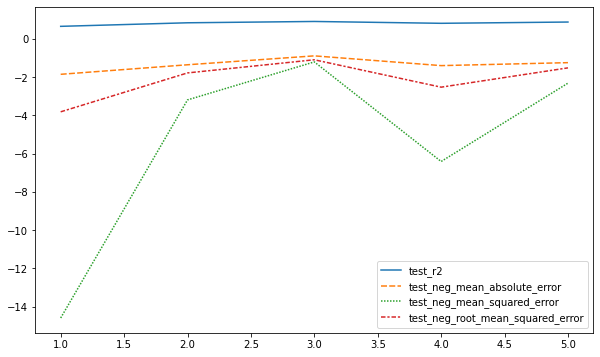

In [66]:
sns.lineplot(data = scores.iloc[:,2:]);

In [67]:
lm.coef_

array([41.92481987, -0.93594617, -3.26056538,  2.11634898, -5.58977189])

In [68]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,41.924820
1,-0.935946
2,-3.260565
3,2.116349
4,-5.589772


## Ridge Regression

In [69]:
from sklearn.linear_model import Ridge

In [70]:
ridge_model = Ridge(alpha=1, random_state=42)

In [71]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [72]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [73]:
ridge_eval = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
ridge_eval

,ridge_train,ridge_test
R2,0.786911,0.727668
mae,1.632048,1.923056
mse,5.229777,7.754441
rmse,2.286871,2.784680


In [74]:
pd.concat([lin_eval, ridge_eval], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.868543,0.860594,0.786911,0.727668
mae,1.239591,1.410048,1.632048,1.923056
mse,3.226313,3.969488,5.229777,7.754441
rmse,1.796194,1.992357,2.286871,2.784680


Ridge seems not working. But we have to be sure.

## For Ridge Regression CV with alpha : 1 

In [72]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [73]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002,0.001000,0.731358,-2.009592,-11.016530,-3.319116
2,0.001,0.001999,0.767419,-1.497360,-4.379599,-2.092749
3,0.001,0.001000,0.796347,-1.117426,-2.447812,-1.564548
4,0.001,0.001000,0.673739,-1.910617,-10.612811,-3.257731
5,0.001,0.001000,0.869258,-1.149349,-2.320653,-1.523369


In [74]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.767624
test_neg_mean_absolute_error       -1.536869
test_neg_mean_squared_error        -6.155481
test_neg_root_mean_squared_error   -2.351503
dtype: float64

In [75]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.812040,0.801682
mae,1.393390,1.503618
mse,4.613038,5.646945
rmse,2.147798,2.376330


<AxesSubplot:>

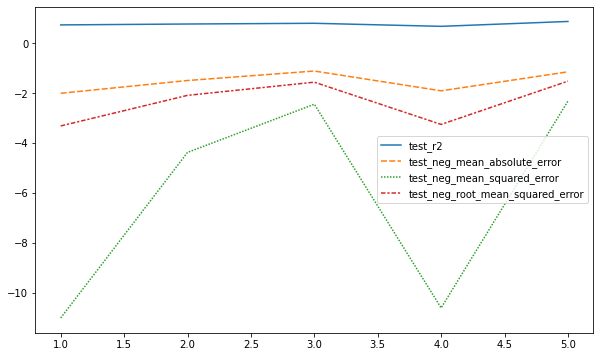

In [76]:
sns.lineplot(data = scores.iloc[:,2:])

In [77]:
ridge_model.coef_

array([20.94995178, -1.17704612, -1.40200582,  3.35306421,  2.41934144,
        2.46429185, -4.01893122])

In [78]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [79]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,38.436049,20.949952
1,-2.227524,-1.177046
2,-3.080429,-1.402006
3,2.007021,3.353064
4,1.136032,2.419341
5,1.443720,2.464292
6,-4.993221,-4.018931


## Choosing best alpha value with Cross-Validation

In [80]:
from sklearn.linear_model import RidgeCV

In [84]:
alpha_space = np.linspace(0.01, 10, 1000)
alpha_space

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,
        1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,  1.06,  1.07,  1.08,
        1.09,  1.1 ,  1.11,  1.12,  1.13,  1.14,  1.15,  1.16,  1.17,
        1.18,  1.19,  1.2 ,  1.21,  1.22,  1.23,  1.24,  1.25,  1.26,
        1.27,  1.28,

In [85]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [86]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67...
        9.37,  9.38,  9.39,  9.4 ,  9.41,  9.42,  9.43,  9.44,  9.45,
        9.46,  9.47,  9.48,  9.49,  9.5 ,  9.51,  9.52,  9.53,  9.54,
        9.55,  9.56,  9.57,  9.58,  9.59,  9.6 ,  9.61,  9.62,  9.63,
        9.64,  9.65,  9.66,  9.67,  9.68,  9.69,  9.7 ,  9.71,  9.72,
        9.73,  9.74,  9.75,  9.76,  9.77,  9.78,  9.79,  9.8 ,  9.81,
        9.82,  9.83,  9.84,  9.85,  9.86,  9.87,  9.88,  9.89,  9.9 ,
        9.91,  9.92,  9.93,  9.94,  9.

In [87]:
ridge_cv_model.alpha_

0.17

In [88]:
#rmse for ridge with CV
ridge_cv_model.best_score_

-1.7815634603051198

In [89]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [90]:
ridge_cv_eval = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
ridge_cv_eval

,ridge_cv_train,ridge_cv_test
R2,0.877209,0.862382
mae,1.179054,1.318063
mse,3.013619,3.918549
rmse,1.735978,1.979532


In [91]:
pd.concat([lin_eval, ridge_eval, ridge_cv_eval], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.882608,0.875796,0.812040,0.801682,0.877209,0.862382
mae,1.153308,1.268372,1.393390,1.503618,1.179054,1.318063
mse,2.881109,3.536602,4.613038,5.646945,3.013619,3.918549
rmse,1.697383,1.880586,2.147798,2.376330,1.735978,1.979532


In [92]:
ridge_cv_model.coef_

array([33.59362561, -1.91493495, -2.57451321,  2.39166265,  1.49505026,
        1.74231894, -4.76431286])

In [129]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.17"])

In [130]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.17
0,38.436049,20.949952,33.593626
1,-2.227524,-1.177046,-1.914935
2,-3.080429,-1.402006,-2.574513
3,2.007021,3.353064,2.391663
4,1.136032,2.419341,1.495050
5,1.443720,2.464292,1.742319
6,-4.993221,-4.018931,-4.764313


## LASSO

In [131]:
from sklearn.linear_model import Lasso, LassoCV

In [132]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [133]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [134]:
las_eval = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
las_eval

,lasso_train,lasso_test
R2,0.126310,0.121726
mae,2.964977,3.372374
mse,21.442652,25.008152
rmse,4.630621,5.000815


In [135]:
pd.concat([lin_eval, ridge_eval, ridge_cv_eval, las_eval], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.882608,0.875796,0.812040,0.801682,0.877209,0.862382,0.126310,0.121726
mae,1.153308,1.268372,1.393390,1.503618,1.179054,1.318063,2.964977,3.372374
mse,2.881109,3.536602,4.613038,5.646945,3.013619,3.918549,21.442652,25.008152
rmse,1.697383,1.880586,2.147798,2.376330,1.735978,1.979532,4.630621,5.000815


## For Lasso CV with Default Alpha : 1

In [136]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [137]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001001,0.002001,0.059427,-3.791034,-38.571288,-6.210579
2,0.002000,0.002000,0.140922,-3.020915,-16.176800,-4.022039
3,0.000999,0.001001,0.249191,-2.116144,-9.024363,-3.004058
4,0.002000,0.001001,0.058324,-3.251211,-30.631407,-5.534565
5,0.000999,0.001999,0.177001,-2.908517,-14.608111,-3.822056


In [138]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.136973
test_neg_mean_absolute_error        -3.017564
test_neg_mean_squared_error        -21.802394
test_neg_root_mean_squared_error    -4.518659
dtype: float64

In [139]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.126310,0.121726
mae,2.964977,3.372374
mse,21.442652,25.008152
rmse,4.630621,5.000815


<AxesSubplot:>

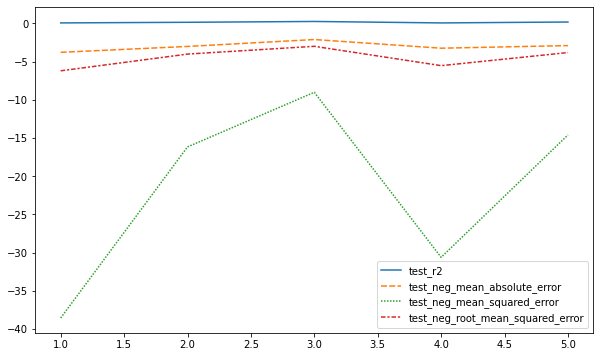

In [140]:
sns.lineplot(data = scores.iloc[:,2:])

In [141]:
lasso_model.coef_

array([ 0.        ,  0.        , -0.        ,  0.22328447,  1.15465895,
        0.        , -0.        ])

In [142]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [143]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.17,lasso_coef_1
0,38.436049,20.949952,33.593626,0.000000
1,-2.227524,-1.177046,-1.914935,0.000000
2,-3.080429,-1.402006,-2.574513,-0.000000
3,2.007021,3.353064,2.391663,0.223284
4,1.136032,2.419341,1.495050,1.154659
5,1.443720,2.464292,1.742319,0.000000
6,-4.993221,-4.018931,-4.764313,-0.000000


### Choosing best alpha value with Cross-Validation

In [144]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [145]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67...
        9.37,  9.38,  9.39,  9.4 ,  9.41,  9.42,  9.43,  9.44,  9.45,
        9.46,  9.47,  9.48,  9.49,  9.5 ,  9.51,  9.52,  9.53,  9.54,
        9.55,  9.56,  9.57,  9.58,  9.59,  9.6 ,  9.61,  9.62,  9.63,
        9.64,  9.65,  9.66,  9.67,  9.68,  9.69,  9.7 ,  9.71,  9.72,
        9.73,  9.74,  9.75,  9.76,  9.77,  9.78,  9.79,  9.8 ,  9.81,
        9.82,  9.83,  9.84,  9.85,  9.86,  9.87,  9.88,  9.89,  9.9 ,
        9.91,  9.92,  9.93,  9.94,  9.

In [146]:
lasso_cv_model.alpha_

0.03

In [147]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([997], dtype=int64),)

In [148]:
alpha_space[::997]

array([0.01, 9.98])

In [149]:
#mse score for CV
lasso_cv_model.mse_path_[997].mean()

3.453252482507053

In [151]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.03)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [152]:
las_cv_eval = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
las_cv_eval

,lasso_cv_train,lasso_cv_test
R2,0.872536,0.856247
mae,1.149067,1.311420
mse,3.128297,4.093258
rmse,1.768699,2.023180


In [153]:
pd.concat([lin_eval,ridge_eval, ridge_cv_eval, las_eval, las_cv_eval], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.882608,0.875796,0.812040,0.801682,0.877209,0.862382,0.126310,0.121726,0.872536,0.856247
mae,1.153308,1.268372,1.393390,1.503618,1.179054,1.318063,2.964977,3.372374,1.149067,1.311420
mse,2.881109,3.536602,4.613038,5.646945,3.013619,3.918549,21.442652,25.008152,3.128297,4.093258
rmse,1.697383,1.880586,2.147798,2.376330,1.735978,1.979532,4.630621,5.000815,1.768699,2.023180


In [154]:
lasso_cv_model.coef_

array([33.73331448, -0.        , -0.        ,  2.21887484,  1.45103977,
        1.26934582, -4.75696203])

In [155]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.03"])

In [156]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.17,lasso_coef_1,lasso_cv_coef_0.03
0,38.436049,20.949952,33.593626,0.000000,33.733314
1,-2.227524,-1.177046,-1.914935,0.000000,-0.000000
2,-3.080429,-1.402006,-2.574513,-0.000000,-0.000000
3,2.007021,3.353064,2.391663,0.223284,2.218875
4,1.136032,2.419341,1.495050,1.154659,1.451040
5,1.443720,2.464292,1.742319,0.000000,1.269346
6,-4.993221,-4.018931,-4.764313,-0.000000,-4.756962


## Elastic net

In [157]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [158]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [160]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [161]:
els_eval = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
els_eval

,elastic_train,elastic_test
R2,0.160943,0.150442
mae,2.922451,3.309815
mse,20.592665,24.190476
rmse,4.537914,4.918381


In [162]:
pd.concat([lin_eval,ridge_eval, ridge_cv_eval, las_eval, las_cv_eval, els_eval], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.882608,0.875796,0.812040,0.801682,0.877209,0.862382,0.126310,0.121726,0.872536,0.856247,0.160943,0.150442
mae,1.153308,1.268372,1.393390,1.503618,1.179054,1.318063,2.964977,3.372374,1.149067,1.311420,2.922451,3.309815
mse,2.881109,3.536602,4.613038,5.646945,3.013619,3.918549,21.442652,25.008152,3.128297,4.093258,20.592665,24.190476
rmse,1.697383,1.880586,2.147798,2.376330,1.735978,1.979532,4.630621,5.000815,1.768699,2.023180,4.537914,4.918381


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [163]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [164]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.107767,-3.672837,-36.588929,-6.048878
2,0.185911,-2.918524,-15.329633,-3.915308
3,0.238810,-2.118007,-9.149143,-3.024755
4,0.097920,-3.177143,-29.343410,-5.416956
5,0.234770,-2.819610,-13.582724,-3.685475


In [165]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.173036
test_neg_mean_absolute_error        -2.941224
test_neg_mean_squared_error        -20.798768
test_neg_root_mean_squared_error    -4.418274
dtype: float64

In [166]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.160943,0.150442
mae,2.922451,3.309815
mse,20.592665,24.190476
rmse,4.537914,4.918381


In [167]:
elastic_model.coef_

array([ 0.        ,  0.        , -0.        ,  0.83201613,  0.9963404 ,
        0.        , -0.        ])

In [168]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [169]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.17,lasso_coef_1,lasso_cv_coef_0.03,"elastic_coef_(alp:1, l1:0.5)"
0,38.436049,20.949952,33.593626,0.000000,33.733314,0.000000
1,-2.227524,-1.177046,-1.914935,0.000000,-0.000000,0.000000
2,-3.080429,-1.402006,-2.574513,-0.000000,-0.000000,-0.000000
3,2.007021,3.353064,2.391663,0.223284,2.218875,0.832016
4,1.136032,2.419341,1.495050,1.154659,1.451040,0.996340
5,1.443720,2.464292,1.742319,0.000000,1.269346,0.000000
6,-4.993221,-4.018931,-4.764313,-0.000000,-4.756962,-0.000000


### Choosing best alpha and l1_ratio values with Cross-Validation

In [171]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [172]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66...
        9.37,  9.38,  9.39,  9.4 ,  9.41,  9.42,  9.43,  9.44,  9.45,
        9.46,  9.47,  9.48,  9.49,  9.5 ,  9.51,  9.52,  9.53,  9.54,
        9.55,  9.56,  9.57,  9.58,  9.59,  9.6 ,  9.61,  9.62,  9.63,
        9.64,  9.65,  9.66,  9.67,  9.68,  9.69,  9.7 ,  9.71,  9.72,
        9.73,  9.74,  9.75,  9.76,  9.77,  9.78,  9.79,  9.8 ,  9.81,
        9.82,  9.83,  9.84,  9.85,  9.86,  9.87,  9.88,  9.89,  9.9 ,
        9.91,  9.92,  9.93,  9.94,  9.95

In [173]:
elastic_cv_model.alpha_

0.01

In [174]:
elastic_cv_model.l1_ratio_

0.95

In [175]:
#mse score for CV
elastic_cv_model.mse_path_[5][-1].mean()

4.057181988229581

In [176]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [178]:
els_cv_eval = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
els_cv_eval

,elastic_cv_train,elastic_cv_test
R2,0.876700,0.860899
mae,1.162150,1.316517
mse,3.026103,3.960786
rmse,1.739570,1.990172


In [179]:
pd.concat([lin_eval,ridge_eval, ridge_cv_eval, las_eval, las_cv_eval, els_eval, els_cv_eval], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.882608,0.875796,0.812040,0.801682,0.877209,0.862382,0.126310,0.121726,0.872536,0.856247,0.160943,0.150442,0.876700,0.860899
mae,1.153308,1.268372,1.393390,1.503618,1.179054,1.318063,2.964977,3.372374,1.149067,1.311420,2.922451,3.309815,1.162150,1.316517
mse,2.881109,3.536602,4.613038,5.646945,3.013619,3.918549,21.442652,25.008152,3.128297,4.093258,20.592665,24.190476,3.026103,3.960786
rmse,1.697383,1.880586,2.147798,2.376330,1.735978,1.979532,4.630621,5.000815,1.768699,2.023180,4.537914,4.918381,1.739570,1.990172


In [180]:
elastic_cv_model.coef_

array([33.89298352, -0.47960107, -1.66976183,  2.29279952,  1.45580368,
        1.53216342, -4.95706552])

In [181]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [182]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.17,lasso_coef_1,lasso_cv_coef_0.03,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,38.436049,20.949952,33.593626,0.000000,33.733314,0.000000,33.892984
1,-2.227524,-1.177046,-1.914935,0.000000,-0.000000,0.000000,-0.479601
2,-3.080429,-1.402006,-2.574513,-0.000000,-0.000000,-0.000000,-1.669762
3,2.007021,3.353064,2.391663,0.223284,2.218875,0.832016,2.292800
4,1.136032,2.419341,1.495050,1.154659,1.451040,0.996340,1.455804
5,1.443720,2.464292,1.742319,0.000000,1.269346,0.000000,1.532163
6,-4.993221,-4.018931,-4.764313,-0.000000,-4.756962,-0.000000,-4.957066


## Grid Search

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [185]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [186]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [187]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [188]:
grid_model.best_params_

{'alpha': 0.012, 'l1_ratio': 0.95}

In [189]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001800,4.003526e-04,0.000200,0.000400,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-3.764947,-2.193469,-1.715809,-3.453505,-1.594221,-2.544390,0.897637,13
1,0.001200,4.009976e-04,0.000600,0.000490,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-3.188023,-2.077588,-1.514676,-3.216468,-1.499218,-2.299195,0.766283,11
2,0.001400,4.896101e-04,0.000200,0.000400,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2.601951,-1.996813,-1.358041,-3.034898,-1.435809,-2.085503,0.652264,9
3,0.001401,4.890466e-04,0.000000,0.000000,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-1.727174,-1.899079,-1.147106,-2.780933,-1.369632,-1.784785,0.563503,3
4,0.001000,1.076850e-06,0.000800,0.000400,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-1.831773,-1.877097,-1.087953,-2.702293,-1.357143,-1.771252,0.551378,2
5,0.001200,4.004717e-04,0.000600,0.000490,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2.414346,-1.862556,-1.041892,-2.635082,-1.350735,-1.860922,0.606087,6
6,0.001600,4.897847e-04,0.000600,0.000490,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2.663339,-1.859558,-1.030894,-2.617749,-1.349839,-1.904276,0.656874,8
7,0.001400,4.898430e-04,0.000400,0.000490,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-3.929429,-2.237768,-1.779767,-3.539189,-1.627492,-2.622729,0.937725,14
8,0.001200,3.999472e-04,0.000200,0.000400,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-3.410340,-2.119274,-1.580962,-3.301860,-1.528311,-2.388149,0.817668,12
9,0.001000,4.101908e-07,0.000400,0.000490,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2.851561,-2.026729,-1.415705,-3.110709,-1.456980,-2.172337,0.699617,10


In [190]:
grid_model.best_index_

11

In [191]:
grid_model.best_score_

-1.7606754476527287

## Using Best Hyper Parameters From GridSearch

In [192]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [193]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.874372,0.857522
mae,1.163828,1.325895
mse,3.083253,4.056952
rmse,1.755919,2.014188


## Final Model

In [194]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X)

In [195]:
final_model = Lasso(alpha=0.03) #lasso_cv_model

In [196]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.03)

## Feature importances with Ridge

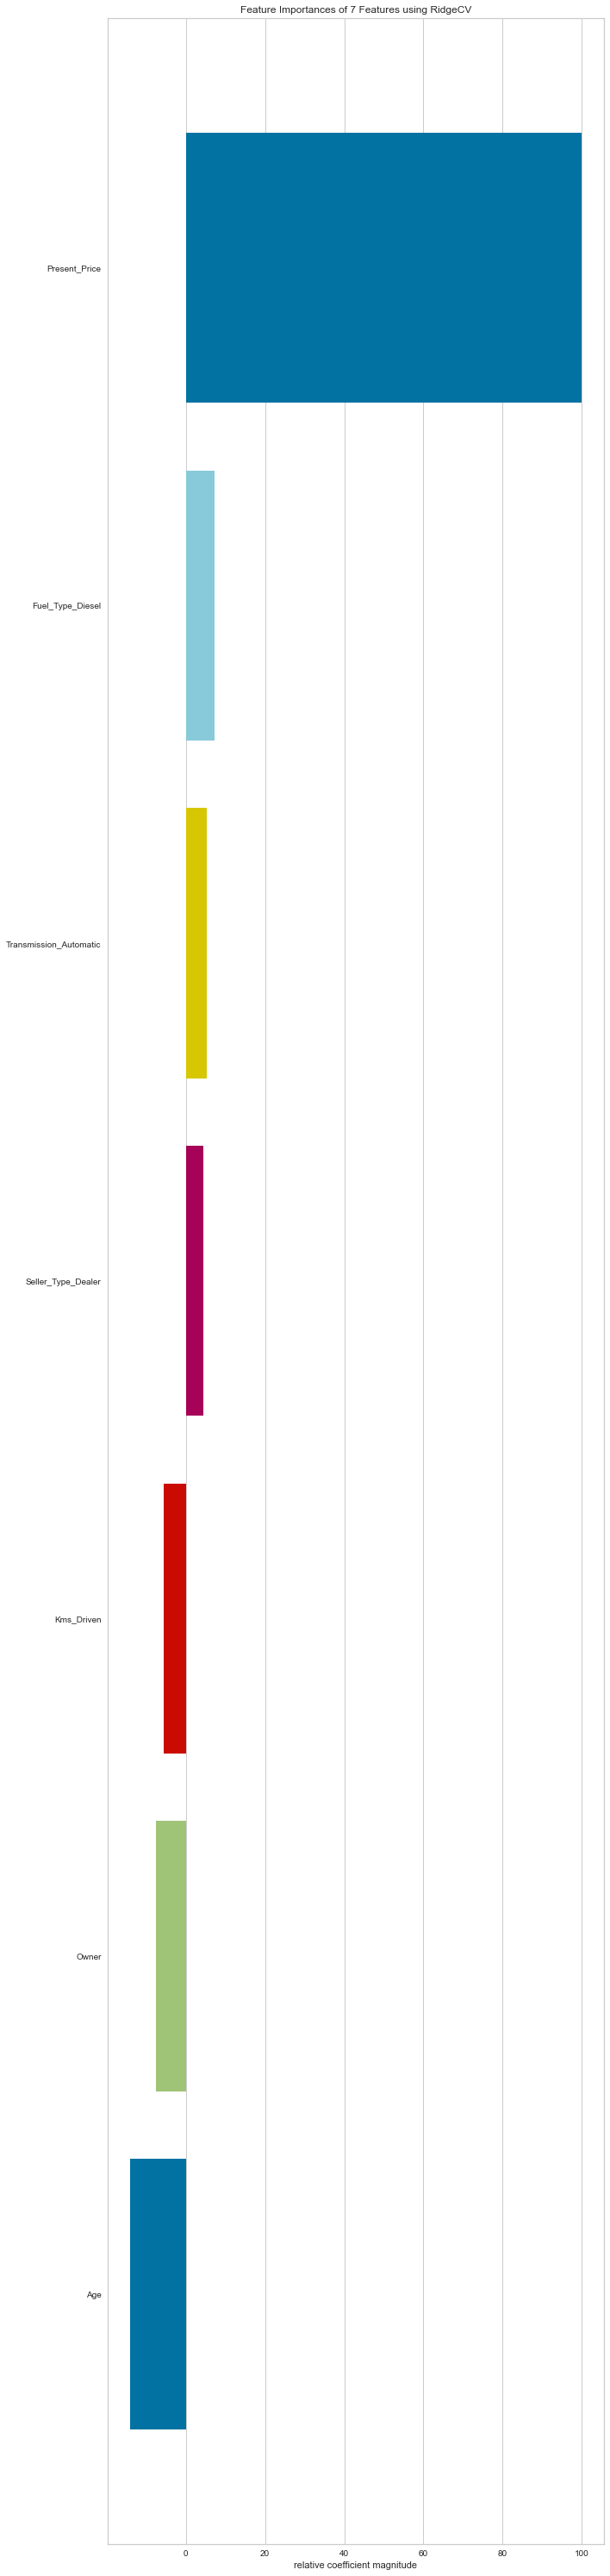

<AxesSubplot:title={'center':'Feature Importances of 7 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [197]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## Feature importances with Lasso

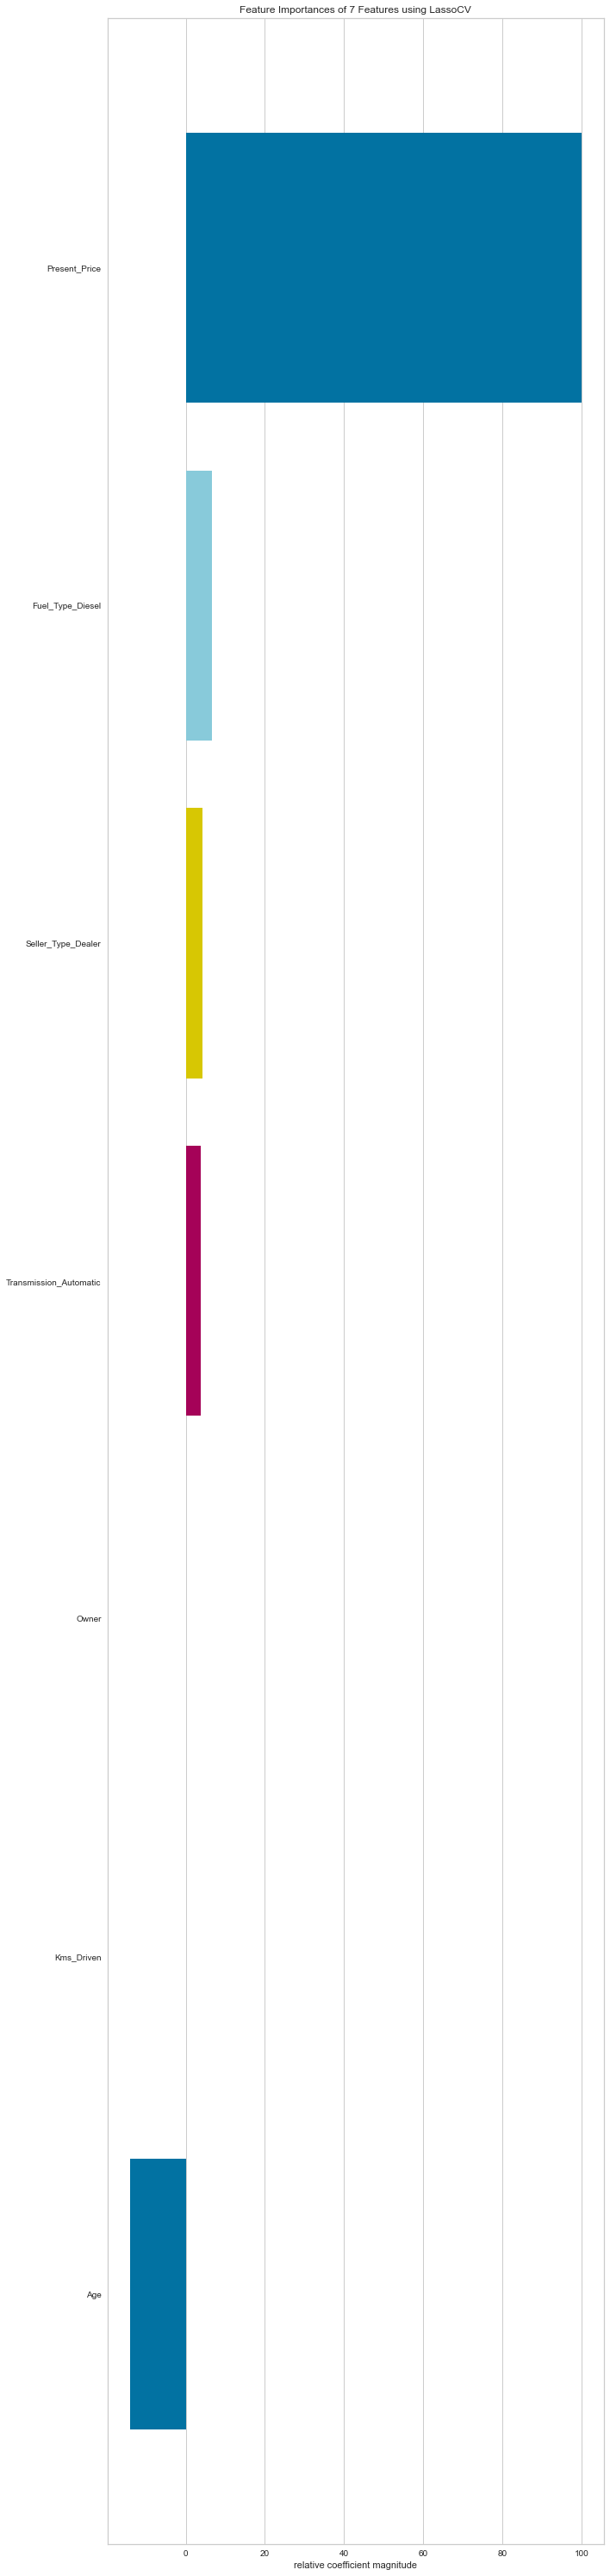

<AxesSubplot:title={'center':'Feature Importances of 7 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [198]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()